# TODO

### preprocesing Rafał 4 backgrounf noise i podział na zbiory jak w planie, https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/data Partitioning sekcja 
### framework 0 Kuba a potem adjustment

### tego inception przepisać na pytorch Rafał
    - przepisać inception na pytorch 1 pkt
    - zrobić żeby najpierw silence rozpoznawał a potem inne 1 pkt balans klas sprawdzić
    - przepisać preprocessing żeby nie było że ściągnieęte 0 
    - specaug 1 pkt przygotować w funkcjach walidacji

### transformera jakiegoś ogarnąć Kuba
    - żeby działało coś 3pkt
    = propozycja 3 modelu 1-3pkt
    - i przygotować testsuit do testów 2 pkt


In [2]:
#import tensorflow_datasets as tfds
# import tensorflow as tf
import random 

import time
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from data_preparation import get_all_classes, create_silence, get_validation_list, get_test_val_lists, make_spec, create_sets

In [3]:
train_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\train"

In [4]:
import shutil
import os
background_noise_dir = os.path.join(train_dir, "audio", "_background_noise_")

if os.path.exists(background_noise_dir):
    shutil.move(background_noise_dir, train_dir)

In [5]:
create_silence(train_dir)
classes = get_all_classes(train_dir)
print(classes)

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'silence', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [6]:
validation_list = get_validation_list(train_dir)
validation_list, training_list = get_test_val_lists(train_dir,validation_list)

Min:  -0.1182251 
Max:  0.10827637 
Mean:  7.842428e-06 
Median:  0.0 
Variance:  0.0003236237 
Length:  10923


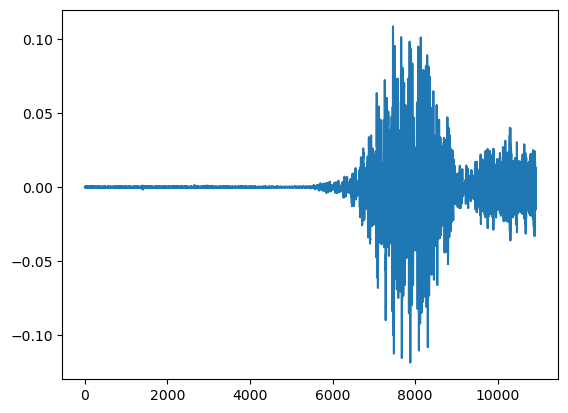

In [7]:
x, r = librosa.load(train_dir+"/audio/yes/bfdb9801_nohash_0.wav", sr=16000)

print("Min: ", np.min(x), 
      "\nMax: ", np.max(x),
      "\nMean: ", np.mean(x),
      "\nMedian: ", np.median(x),
      "\nVariance: ", np.var(x),
      "\nLength: ", len(x),)
plt.plot(x)

c:\Users\rafci\Desktop\transformers\data_preparation.py:36: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


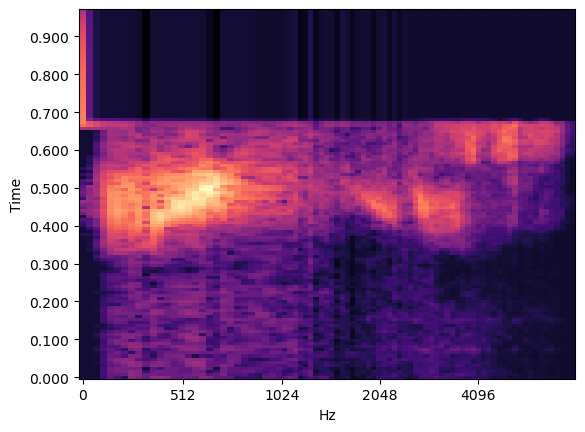

In [8]:
librosa.display.specshow(make_spec("yes/bfdb9801_nohash_0.wav",train_dir),
                         x_axis="mel",
                         fmax=8000,
                         y_axis="time",
                         sr=16000,
                         hop_length=128)

In [9]:
make_spec('yes/bfdb9801_nohash_0.wav',train_dir).shape

c:\Users\rafci\Desktop\transformers\data_preparation.py:36: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


(122, 85)

In [10]:
X_train, y_train = create_sets(training_list, classes,train_dir)

0 bed/00176480_nohash_0.wav
2000 bird/50d1c8e3_nohash_2.wav
4000 cat/98582fee_nohash_0.wav
6000 dog/da76aa58_nohash_0.wav
8000 down/d90b4138_nohash_2.wav
10000 eight/c7aaad67_nohash_2.wav
12000 five/c1b7c224_nohash_0.wav
14000 four/b5aacf2c_nohash_1.wav
16000 go/acde7e73_nohash_0.wav
18000 happy/ccea893d_nohash_0.wav
20000 left/0a7c2a8d_nohash_1.wav
22000 left/fd395b74_nohash_0.wav
24000 nine/2df590cd_nohash_0.wav
26000 no/25132942_nohash_2.wav
28000 off/1a4259c3_nohash_0.wav
30000 on/0ac15fe9_nohash_1.wav
32000 on/f97e1fcd_nohash_0.wav
34000 one/eb6dab4a_nohash_0.wav
36000 right/df1d5024_nohash_3.wav
38000 seven/cd3331a6_nohash_1.wav
40000 silence/frag15_exercise_bike.wav
42000 six/c7aa72e6_nohash_0.wav
44000 stop/bab36420_nohash_1.wav
46000 three/b0c0197e_nohash_0.wav
48000 tree/db9d52d2_nohash_1.wav
50000 two/d750966e_nohash_0.wav
52000 up/c948d727_nohash_1.wav
54000 wow/f9ebdba0_nohash_0.wav
56000 yes/ec21c46b_nohash_0.wav
58000 zero/dbb40d24_nohash_3.wav


In [12]:
X_train.shape

(58288, 122, 85)

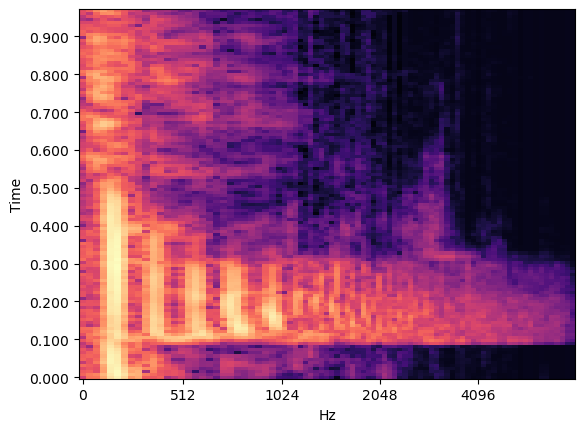

In [13]:
librosa.display.specshow(X_train[6500],
                         x_axis="mel",
                         fmax=8000,
                         y_axis="time",
                         sr=16000,
                         hop_length=128)

In [15]:
X_val, y_val = create_sets(validation_list, classes,train_dir)

0 up/b83c1acf_nohash_1.wav


c:\Users\rafci\Desktop\transformers\data_preparation.py:34: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


2000 six/27c30960_nohash_0.wav
4000 left/1b4c9b89_nohash_2.wav
6000 seven/4290ca61_nohash_0.wav


In [10]:
X_val, y_val = create_sets(validation_list, classes,train_dir,method='fbank')

0 house/1f653d27_nohash_0.wav
92 15019 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
49 8192 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
66 10923 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
86 14118 400 160.0
98 16000 400 160.0
83 13654 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
98 16000 400 160.0
91 14861 400 160.0
98 16000 400 160.0
98